## Descripción del proyecto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
Analizar los factores que más impactan la pérdida.
Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
identificar a los grupos objetivo;
sugerir medidas para reducir la rotación;
describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

### Paso 1. Descargar los datos

In [17]:
#Importar Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


In [2]:
# Lee los datos
gym_data = pd.read_csv("/datasets/gym_churn_us.csv")

In [3]:
# Muestra el tamaño del dataset
gym_data.shape

(4000, 14)

In [4]:
# Mostrar las primeras filas
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
# Verificar si hay valores ausentes
missing_values = gym_data.isnull().sum()
print(missing_values)

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


### Paso 2: Análisis exploratorio de datos (EDA)

In [6]:
# Comprueba la información del dataset para ver si hay valores ausentes y los tipos de datos
print(gym_data.info())

# Calcula estadísticas descriptivas
print(gym_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
# Agrupa los datos por la columna 'Churn' y calcula los valores medios para cada grupo
grouped_data = gym_data.groupby('Churn').mean()
grouped_data


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


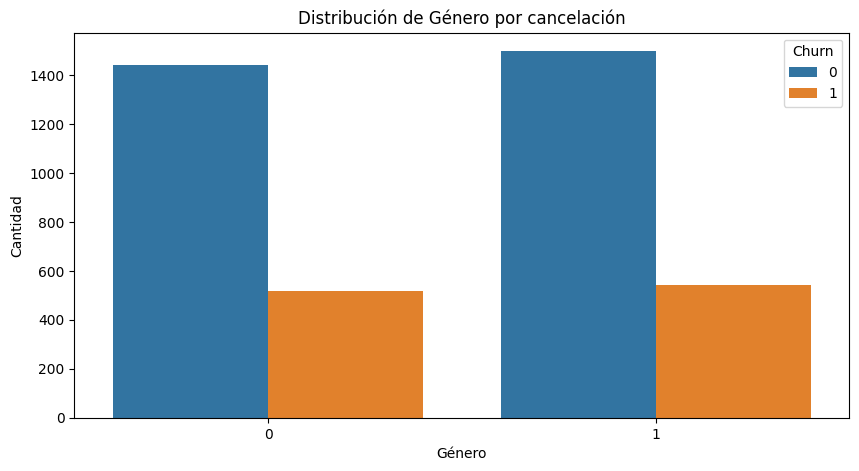

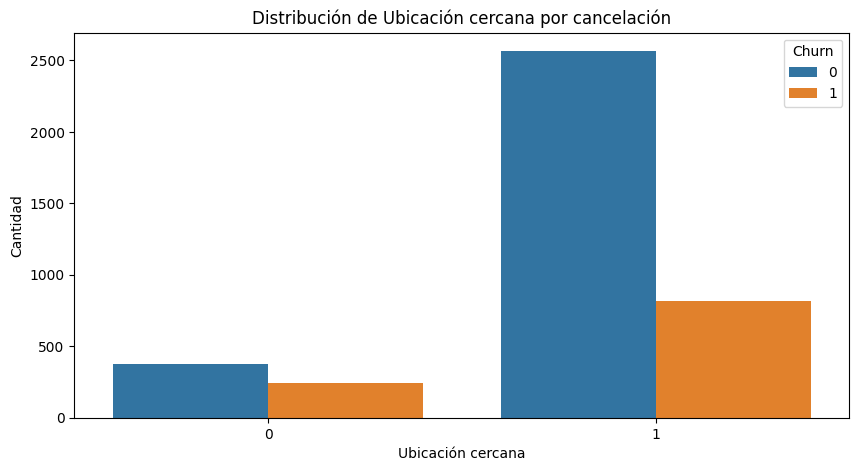

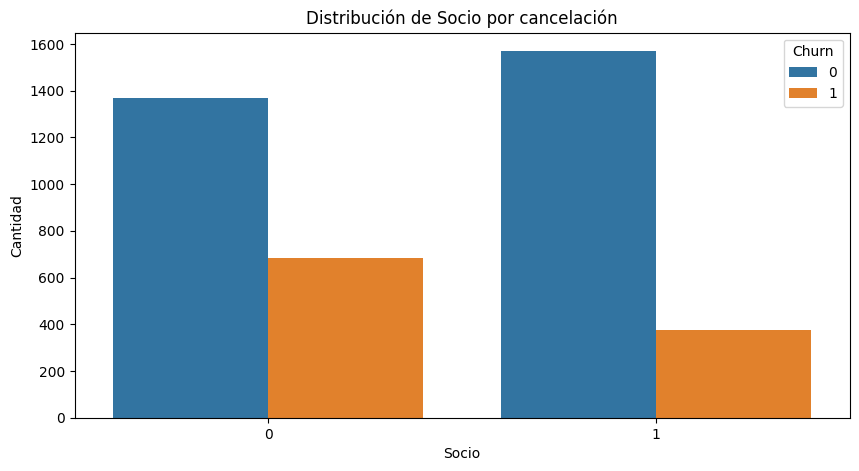

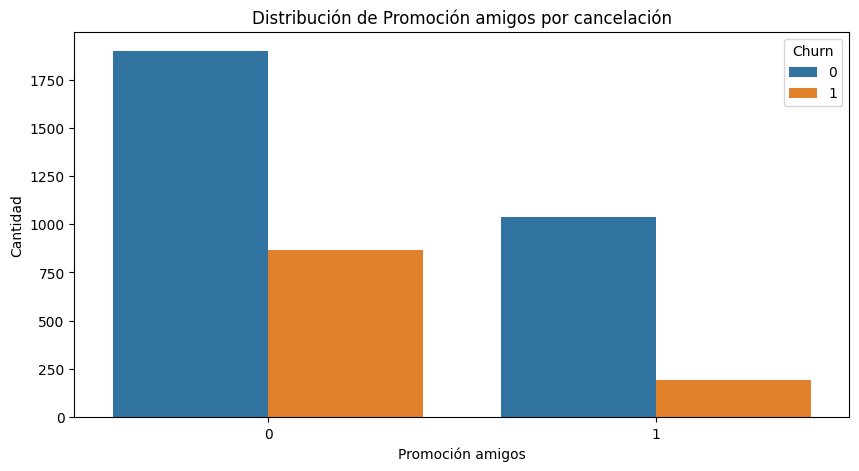

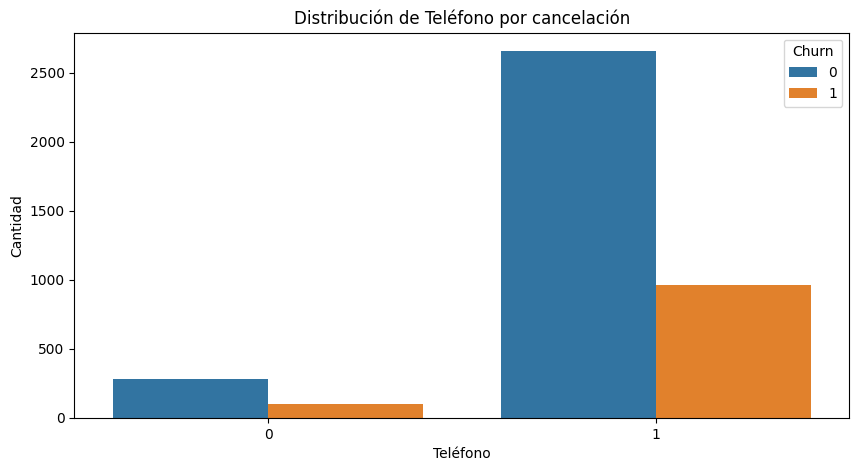

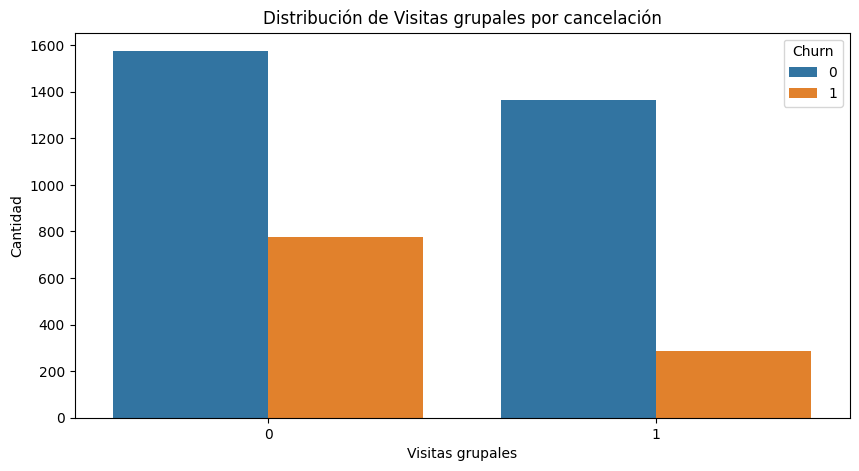

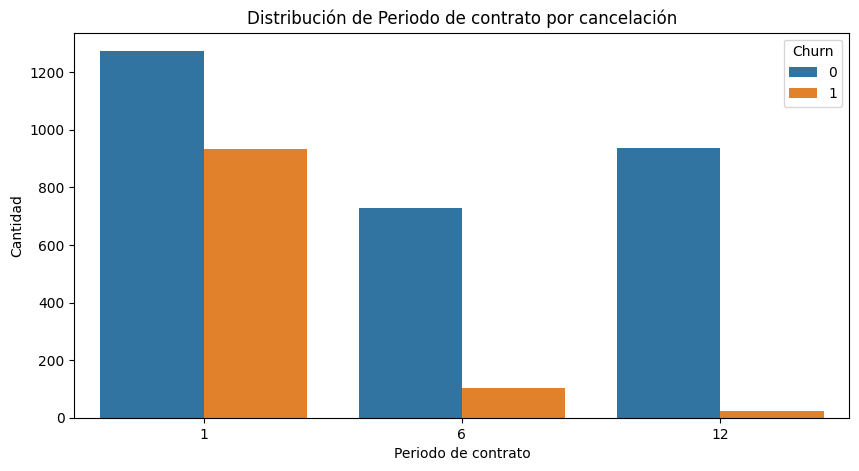

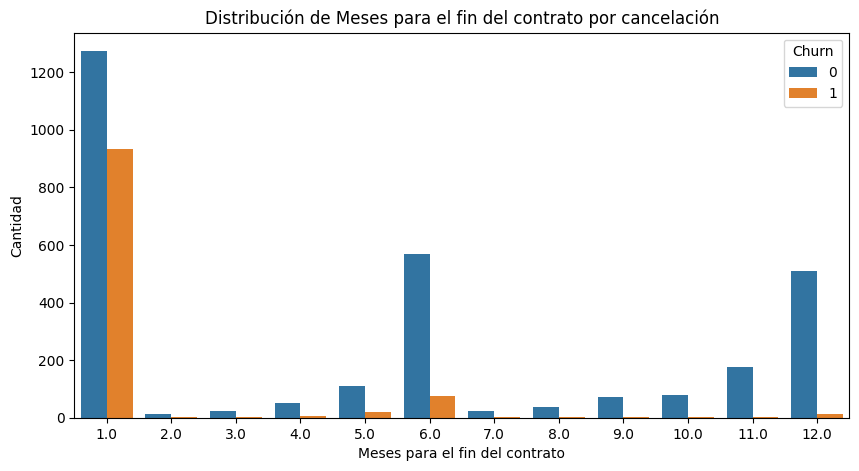

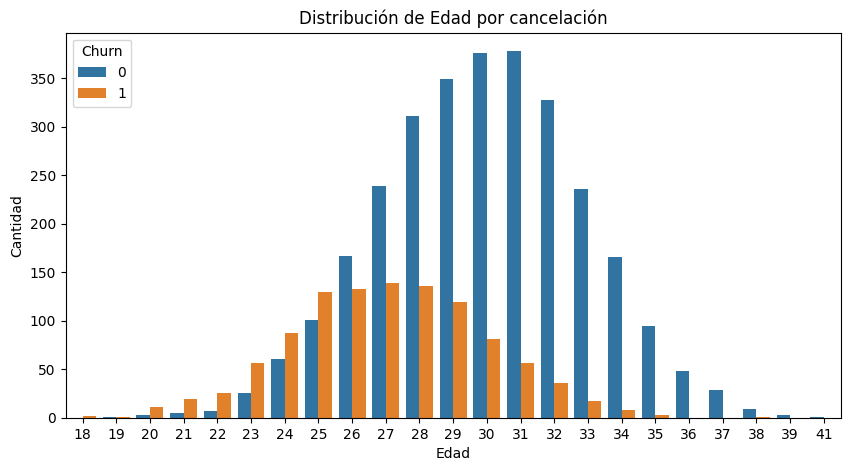

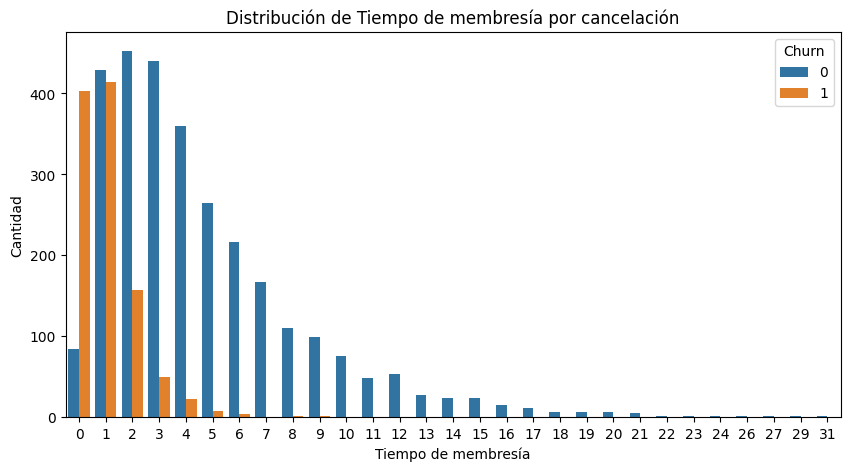

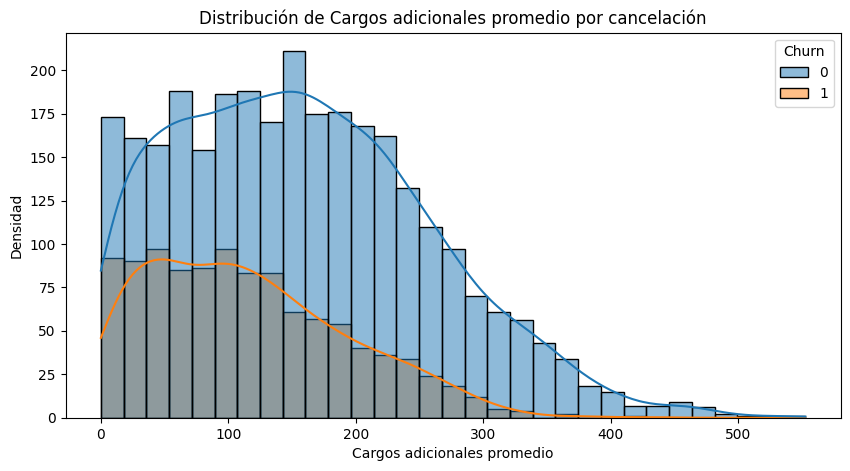

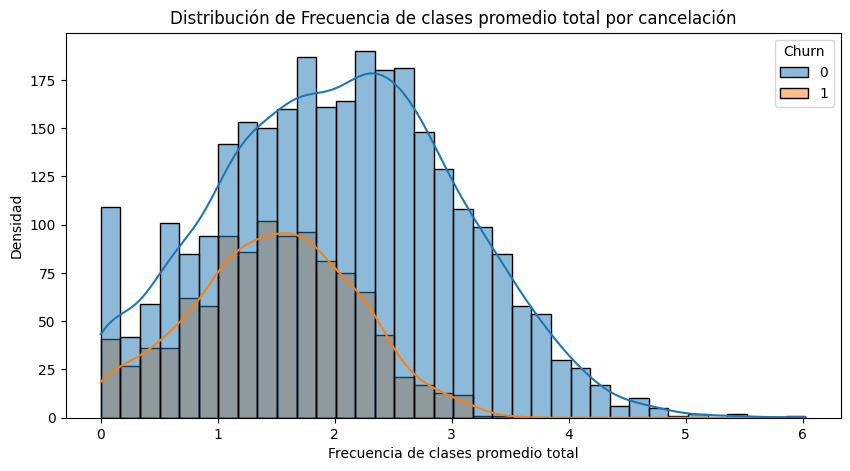

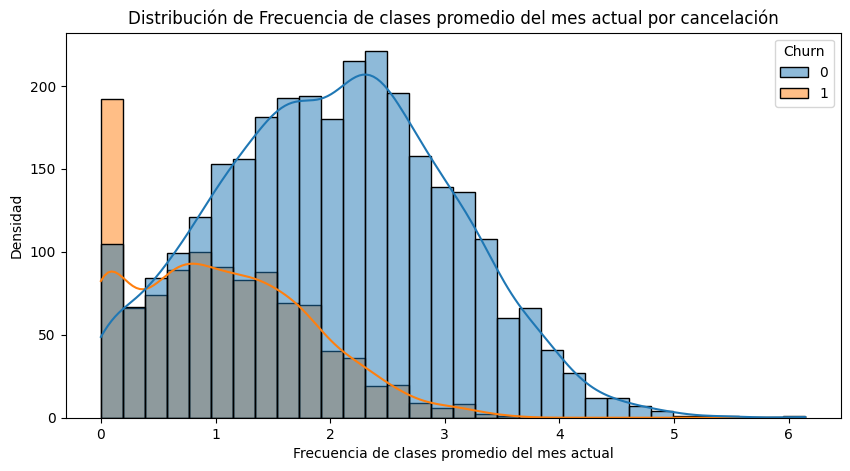

In [8]:
column_translation = {
    'gender': 'Género',
    'Near_Location': 'Ubicación cercana',
    'Partner': 'Socio',
    'Promo_friends': 'Promoción amigos',
    'Phone': 'Teléfono',
    'Group_visits': 'Visitas grupales',
    'Contract_period': 'Periodo de contrato',
    'Month_to_end_contract': 'Meses para el fin del contrato',
    'Age': 'Edad',
    'Lifetime': 'Tiempo de membresía',
    'Avg_additional_charges_total': 'Cargos adicionales promedio',
    'Avg_class_frequency_total': 'Frecuencia de clases promedio total',
    'Avg_class_frequency_current_month': 'Frecuencia de clases promedio del mes actual'
}

# Identifica las columnas binarias, discretas y continuas
binary_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']
discrete_columns = ['Contract_period', 'Month_to_end_contract', 'Age', 'Lifetime']
continuous_columns = ['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

# Traza histogramas de barras para características binarias y discretas, separando por cancelación
for column in binary_columns + discrete_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=gym_data, x=column, hue='Churn')
    plt.title(f'Distribución de {column_translation[column]} por cancelación')
    plt.xlabel(column_translation[column])
    plt.ylabel('Cantidad')
    plt.show()

# Traza histogramas y funciones de densidad para características continuas, separando por cancelación
for column in continuous_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=gym_data, x=column, hue='Churn', kde=True)
    plt.title(f'Distribución de {column_translation[column]} por cancelación')
    plt.xlabel(column_translation[column])
    plt.ylabel('Densidad')
    plt.show()

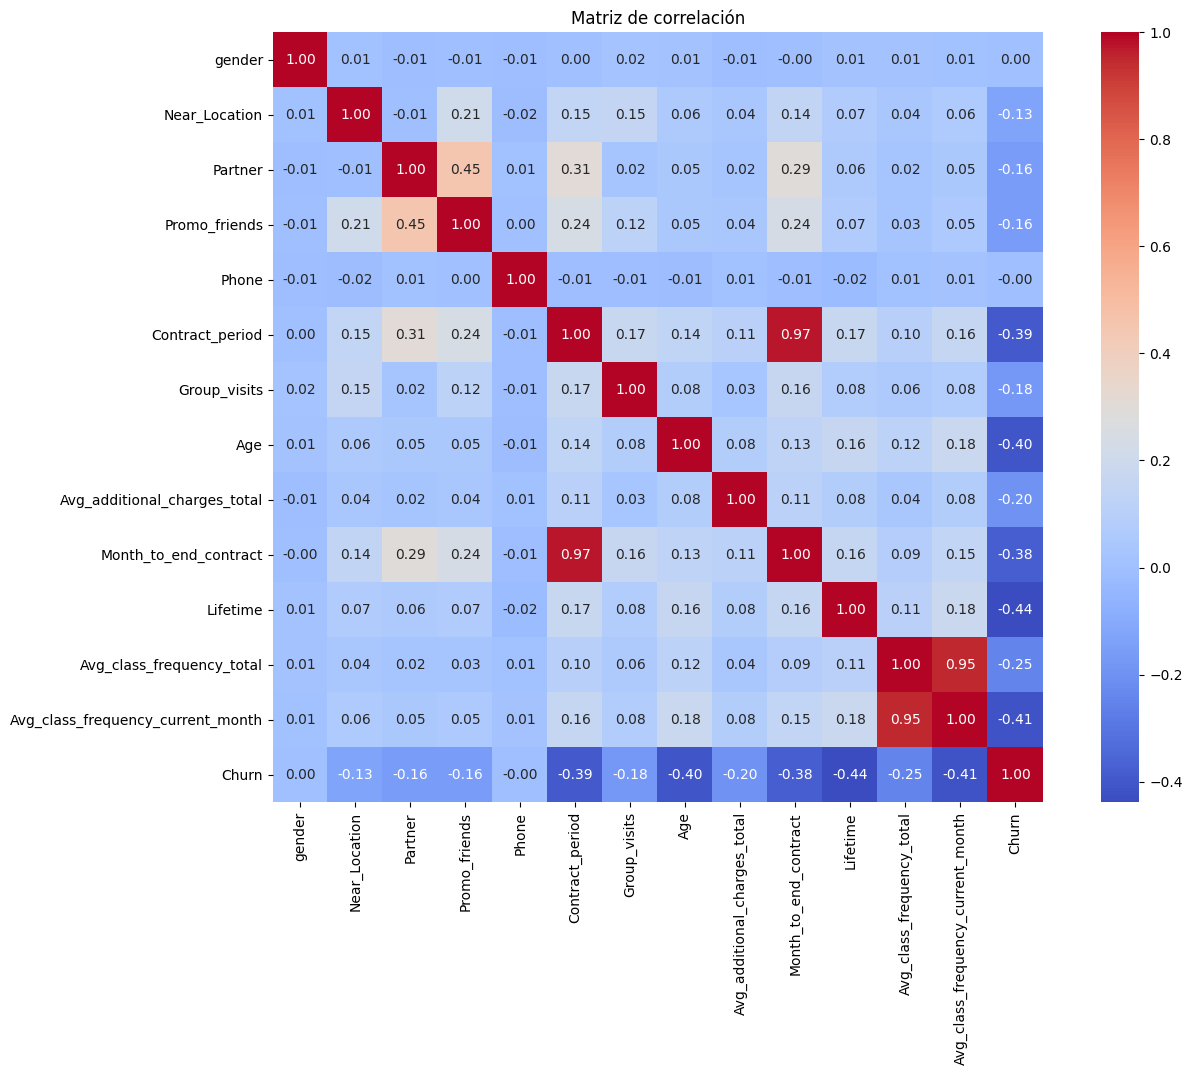

In [9]:
# Calcula la matriz de correlación
correlation_matrix = gym_data.corr()

#Mapa de calor para la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de correlación')
plt.show()

### Paso 3: Construir un modelo para predecir la cancelación de usuarios

In [10]:
# Definir la característica objetivo y las características
X = gym_data.drop(columns=['Churn'])
y = gym_data['Churn']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [11]:
# Creacion de un objeto StandardScaler y aplícarlo al conjunto de entrenamiento
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # Entrena el scaler y transforma la matriz para el conjunto de entrenamiento

# Aplicar la estandarización a la matriz de característica para el set de prueba
X_test_st = scaler.transform(X_test)

# Entrenar el modelo de regresión logística
logreg = LogisticRegression(random_state=0, max_iter=200, solver='liblinear')
logreg.fit(X_train_st, y_train)
y_pred_logreg = logreg.predict(X_test_st)

# Entrenar el modelo de bosque aleatorio
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_st, y_train)
y_pred_rf = rf.predict(X_test_st)

# Evalúar las métricas para ambos modelos
models = {'Logistic Regression': logreg, 'Random Forest': rf}
for name, model in models.items():
    y_pred = model.predict(X_test_st)
    print(f'{name}:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'Precision: {precision_score(y_test, y_pred):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred):.2f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')
    print()


Logistic Regression:
Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1 Score: 0.84

Random Forest:
Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1 Score: 0.83



#### Comparación de los Modelos:
Ambos modelos tienen la misma exactitud (0.92), lo que indica que la proporción de predicciones correctas es igual en ambos casos. Sin embargo, al observar más detalladamente otras métricas:

Precisión (Precision): 

La regresión logística tiene una ligera ventaja con una precisión de 0.85 en comparación con 0.84 para el bosque aleatorio. Esto indica que, de las predicciones positivas hechas por el modelo, un mayor porcentaje es correcto en el modelo de regresión logística.

Recall: 

La regresión logística también muestra un mejor rendimiento en recall con 0.83 frente a 0.81 para el bosque aleatorio. Esto significa que la regresión logística es ligeramente mejor en identificar todos los casos positivos verdaderos.

F1 Score:

La F1 Score, que es una media armónica de precisión y recall, es ligeramente superior en el modelo de regresión logística (0.84) comparado con el bosque aleatorio (0.83).

#### Conclusión:
Ambos modelos tienen un rendimiento muy similar con una exactitud de 0.92. Sin embargo, la regresión logística presenta una ligera ventaja en términos de precisión, recall y F1 Score. Por lo tanto, el modelo de regresión logística da mejores resultados en comparación con el modelo de bosque aleatorio en este caso específico.








### Paso 4: Crear clústeres de usuarios/as

In [12]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar los datos estandarizados
print(X_scaled[:5])

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]]


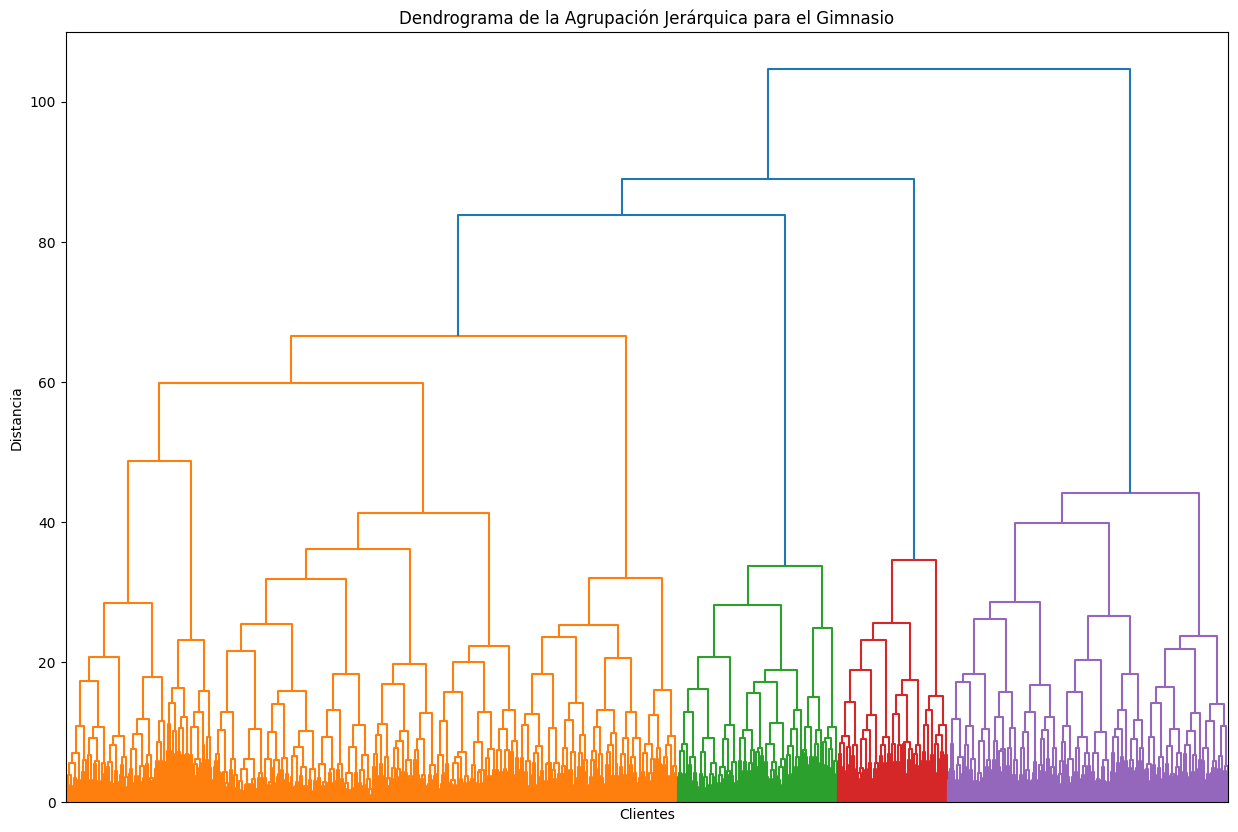

In [13]:
# Matriz de distancias y trazo del dendrograma
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrograma de la Agrupación Jerárquica para el Gimnasio')
plt.xlabel('Clientes')
plt.ylabel('Distancia')

# Eliminar los ticks del eje X y sus etiquetas
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.show()

In [14]:
# Definir el modelo k_means con 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=0)

# Entrenar el modelo y predice los clústeres para las observaciones
clusters = kmeans.fit_predict(X_scaled)

# Añadir los clústeres predichos al DataFrame original
gym_data['Cluster'] = clusters

# Imprimir los valores medios de las características para los clústeres
gym_data.groupby('Cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


##### Near_Location:

El Cluster 2 tiene una media de 0, lo que sugiere que todos los clientes en este clúster no viven ni trabajan cerca del gimnasio.

Los Clusters 0, 3 y 4 tienen medias muy altas, cercanas a 1, lo que indica que la mayoría de los clientes en estos clústeres viven o trabajan cerca del gimnasio.

##### Contract_period:

El Cluster 0 tiene un periodo de contrato significativamente más largo (media de 10.88 meses) comparado con los otros clústeres.

El Cluster 3 tiene el periodo de contrato más corto (media de 1.95 meses).

##### Group_visits:

Los Clusters 0 y 4 tienen una participación notablemente mayor en sesiones grupales comparado con los otros clústeres.

##### Avg_additional_charges_total:

Los Clusters 0 y 4 tienen gastos adicionales totales más altos en comparación con los otros clústeres.

##### Avg_class_frequency_total y Avg_class_frequency_current_month:

El Cluster 4 tiene la frecuencia de clases promedio más alta tanto en total (2.85) como en el mes actual (2.85), lo que indica que estos clientes son los más activos.

El Cluster 3 tiene la frecuencia de clases promedio más baja tanto en total (1.25) como en el mes actual (1.01), lo que indica que estos clientes son los menos activos.

##### Churn (Cancelación):

El Cluster 3 tiene la tasa de cancelación más alta (0.514263), lo que sugiere que los clientes en este clúster son los más propensos a cancelar.

El Cluster 0 tiene la tasa de cancelación más baja (0.027723), indicando que estos clientes son los más leales.

##### Observaciones:

Los clientes del Cluster 0 parecen ser los más leales, tienen contratos más largos, participan más en sesiones grupales y tienen gastos adicionales más altos. También tienen una alta frecuencia de clases.

Los clientes del Cluster 3 son los menos activos y los más propensos a cancelar sus membresías.

La proximidad al gimnasio (Near_Location) parece ser un factor importante en la retención de clientes.

La frecuencia de visitas y el gasto adicional en el gimnasio parecen correlacionarse con una menor tasa de cancelación.






Estas observaciones pueden ayudar a identificar qué características son importantes para la retención de clientes y qué grupos necesitan más atención para reducir la tasa de cancelación.

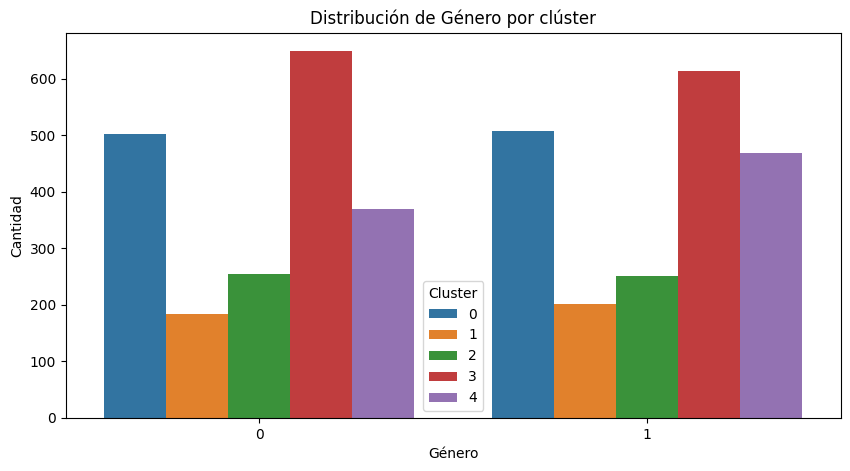

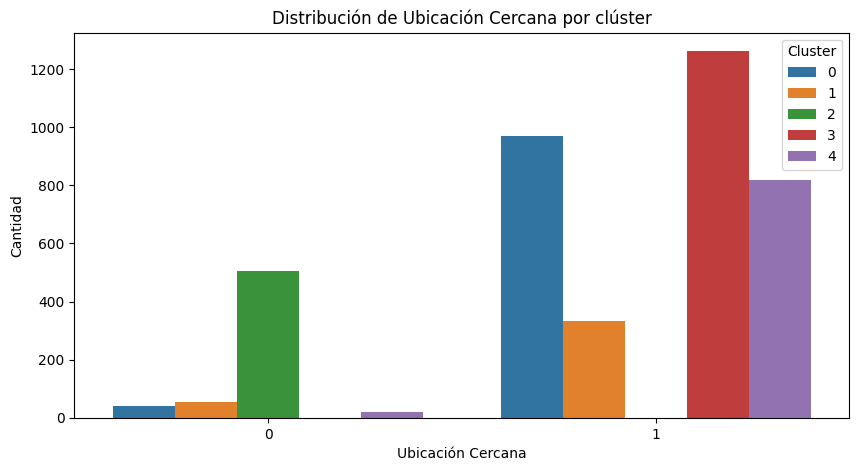

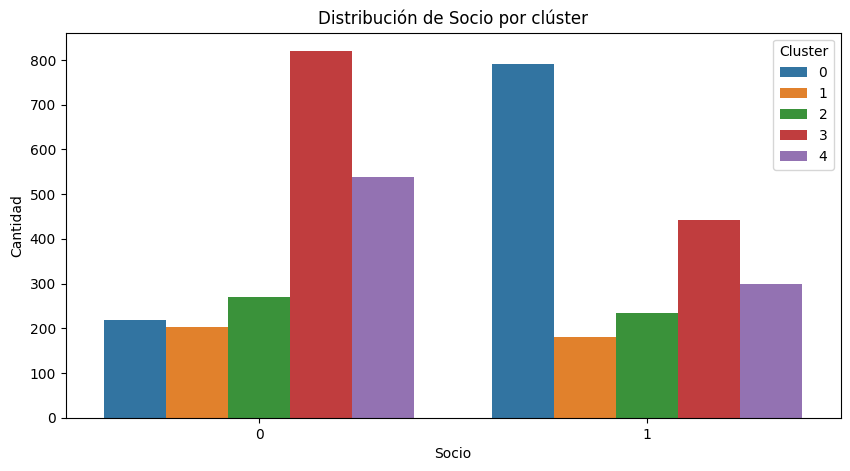

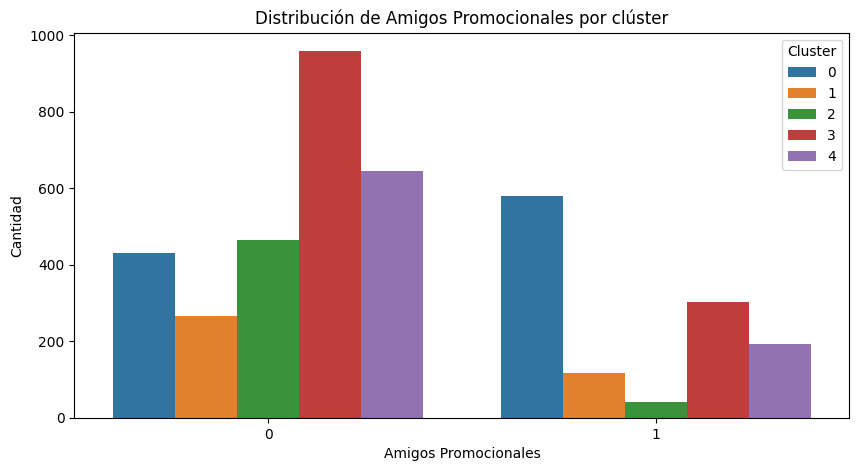

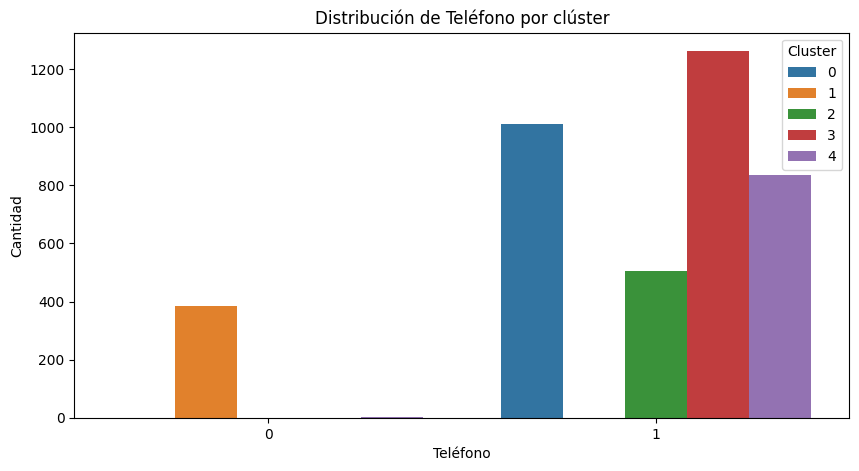

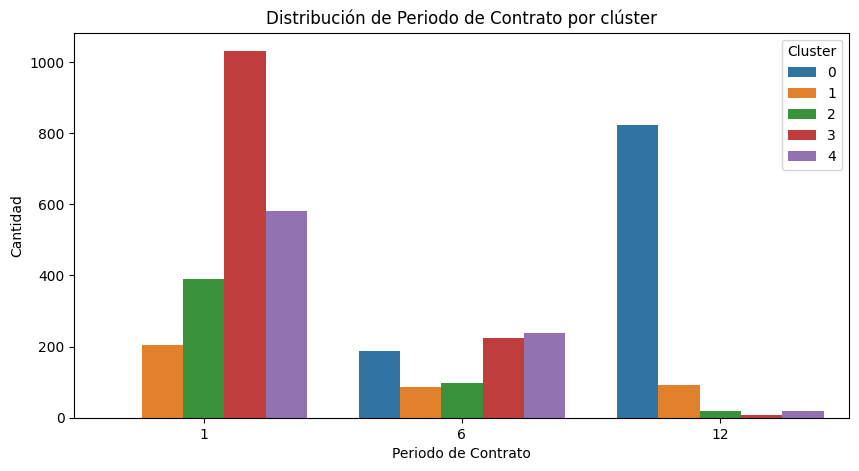

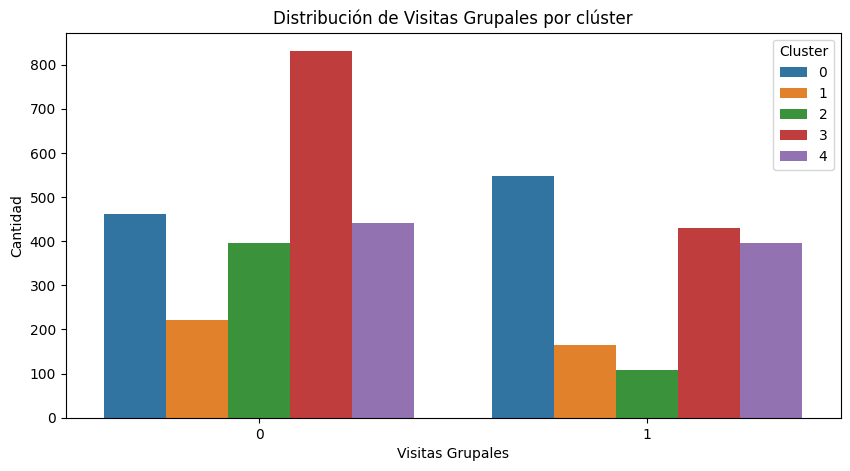

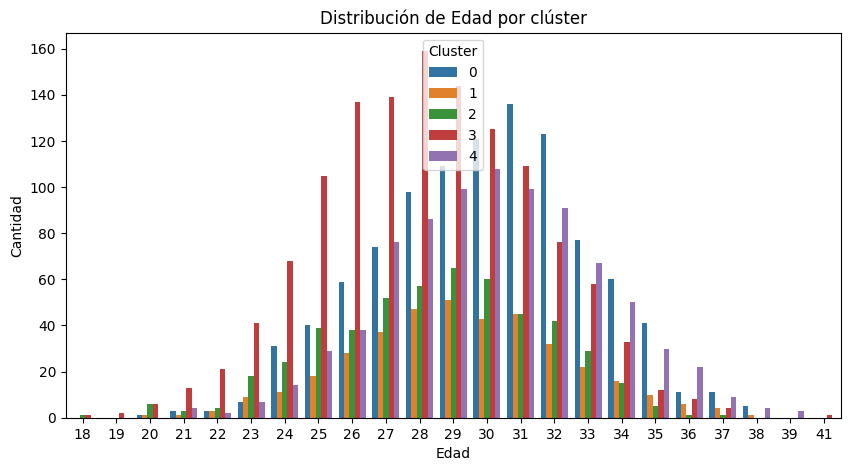

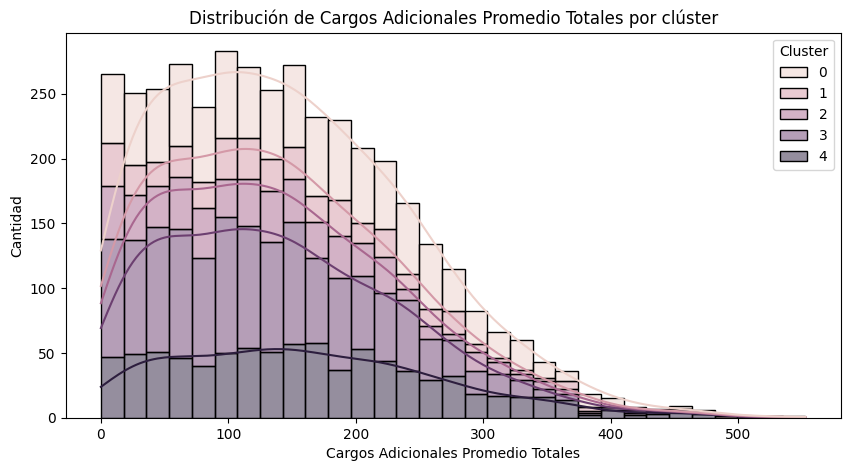

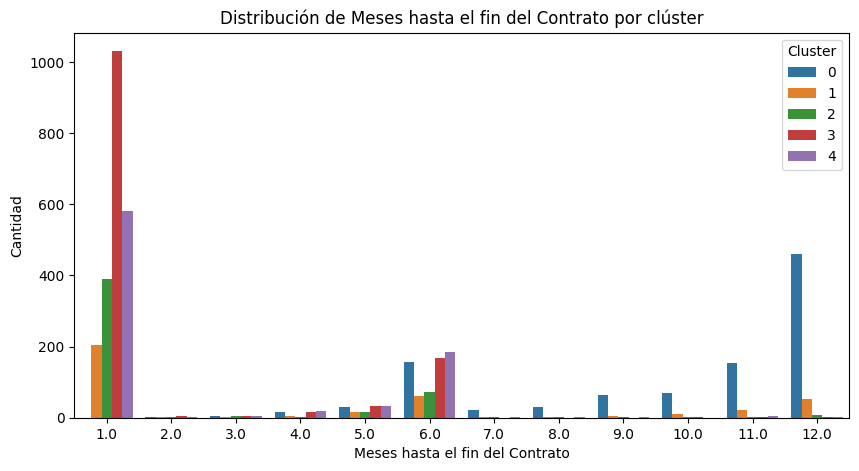

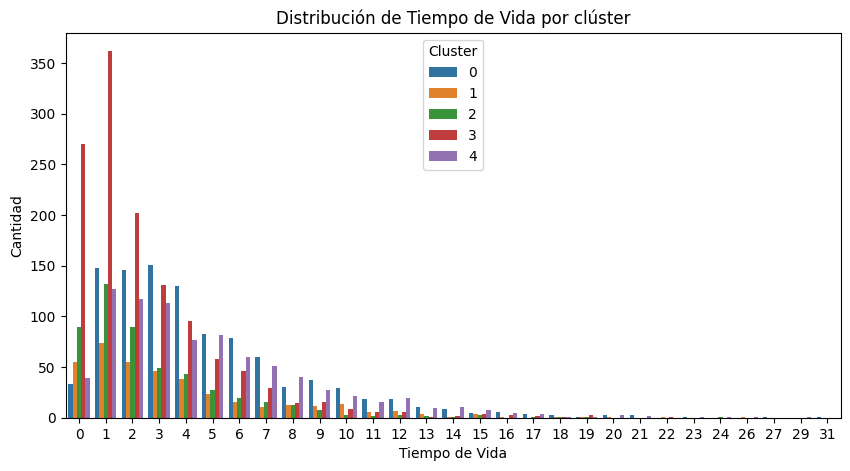

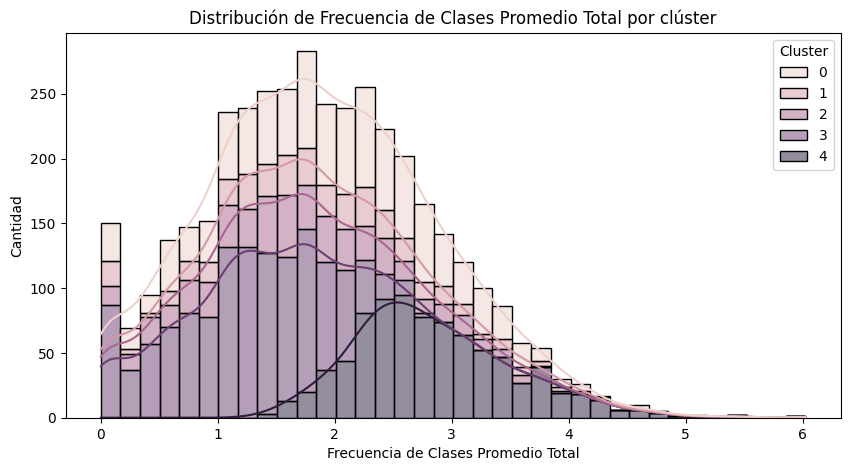

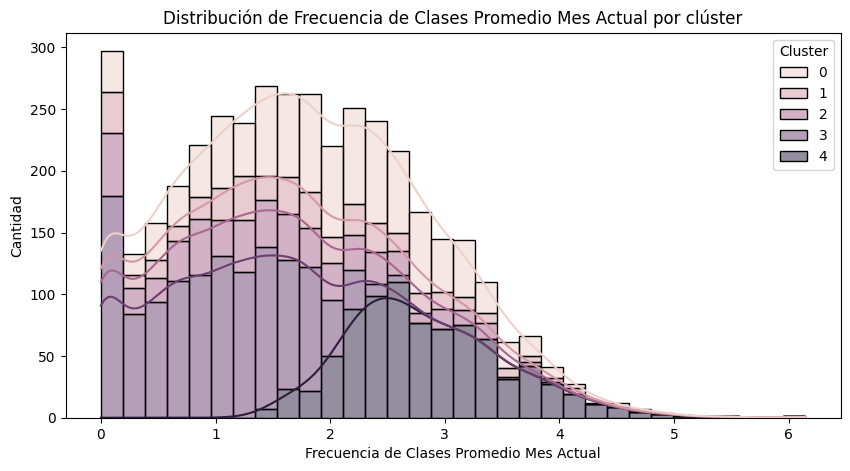

In [15]:
# Listas de columnas según el tipo de variable
binary_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']
discrete_columns = ['Contract_period', 'Month_to_end_contract', 'Age', 'Lifetime']
continuous_columns = ['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

# Traducción de los nombres de las columnas
column_translation = {
    'gender': 'Género',
    'Near_Location': 'Ubicación Cercana',
    'Partner': 'Socio',
    'Promo_friends': 'Amigos Promocionales',
    'Phone': 'Teléfono',
    'Group_visits': 'Visitas Grupales',
    'Contract_period': 'Periodo de Contrato',
    'Month_to_end_contract': 'Meses hasta el fin del Contrato',
    'Age': 'Edad',
    'Lifetime': 'Tiempo de Vida',
    'Avg_additional_charges_total': 'Cargos Adicionales Promedio Totales',
    'Avg_class_frequency_total': 'Frecuencia de Clases Promedio Total',
    'Avg_class_frequency_current_month': 'Frecuencia de Clases Promedio Mes Actual',
    'Churn': 'Cancelación'
}

# Trazar las distribuciones de características por clúster
for column in gym_data.columns:
    if column not in ['Cluster', 'Churn']:  # Excluir 'Churn' y 'Cluster'
        plt.figure(figsize=(10, 5))
        translated_column = column_translation.get(column, column)
        
        if column in binary_columns or column in discrete_columns:
            sns.countplot(data=gym_data, x=column, hue='Cluster')
        elif column in continuous_columns:
            sns.histplot(data=gym_data, x=column, hue='Cluster', multiple='stack', kde=True)
        
        plt.title(f'Distribución de {translated_column} por clúster')
        plt.xlabel(translated_column)
        plt.ylabel('Cantidad')
        plt.show()


In [16]:
# Calcular la tasa de cancelación por clúster
churn_rate_by_cluster = gym_data.groupby('Cluster')['Churn'].mean()
churn_rate_by_cluster


Cluster
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: Churn, dtype: float64

#### ¿Difieren en términos de tasa de cancelación? 

Sí, los clústeres difieren significativamente en términos de tasa de cancelación.

Clúster 0: 2.77%
Clúster 1: 26.75%
Clúster 2: 44.36%
Clúster 3: 51.43%
Clúster 4: 6.80%




#### ¿Qué grupos son propensos a irse y cuáles son leales?

Clústeres leales: Clúster 0 y Clúster 4. Estos grupos tienen las tasas de cancelación más bajas y representan a los clientes más leales.

Clústeres propensos a irse: Clúster 2 y Clúster 3. Estos grupos tienen las tasas de cancelación más altas y representan a los clientes más propensos a abandonar el gimnasio.

Clúster moderado: Clúster 1. Este grupo tiene una tasa de cancelación intermedia, lo que sugiere que contiene tanto clientes leales como propensos a irse.

### Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

#### Conclusiones
Distribución de la tasa de cancelación:

La tasa de cancelación difiere significativamente entre los clústeres. Los clústeres 2 y 3 tienen tasas de cancelación considerablemente más altas (44.36% y 51.43% respectivamente), mientras que los clústeres 0 y 4 tienen las tasas más bajas (2.77% y 6.80% respectivamente).
Importancia de la localización y el compromiso:

Los usuarios que viven cerca del gimnasio (característica Near_Location) y aquellos que tienen una alta frecuencia de visitas (Avg_class_frequency_total y Avg_class_frequency_current_month) tienden a tener una menor tasa de cancelación. Esto sugiere que la proximidad y el compromiso regular son factores clave para la retención.
Participación en visitas grupales:

Los usuarios que participan en visitas grupales (Group_visits) parecen tener una mayor retención. Esto indica que fomentar actividades grupales puede ser beneficioso para mantener a los clientes comprometidos.


#### Recomendaciones

##### Fomentar la proximidad y el acceso:

Estrategia: Ofrecer servicios adicionales o descuentos a aquellos usuarios que viven o trabajan cerca del gimnasio.

Ejemplo de implementación: Crear campañas de marketing dirigidas a oficinas y residencias cercanas al gimnasio, ofreciendo un descuento especial para nuevos miembros que se inscriban desde estas ubicaciones.

##### Incentivar la frecuencia de visitas:

Estrategia: Implementar programas de recompensas para clientes que visiten el gimnasio regularmente.

Ejemplo de implementación: Introducir un sistema de puntos donde los usuarios ganen puntos por cada visita y puedan canjear estos puntos por productos del gimnasio, sesiones de entrenamiento personal o descuentos en la renovación de membresías.

##### Promover actividades grupales:

Estrategia: Incrementar la oferta de clases y actividades grupales, y fomentar la participación en estas.

Ejemplo de implementación: Organizar eventos especiales y desafíos en grupo, ofrecer una clase grupal gratuita para nuevos miembros y promover estas actividades a través de canales de comunicación interna y redes sociales.

##### Atención personalizada a clústeres con alta tasa de cancelación:

Estrategia: Identificar a los usuarios en los clústeres 2 y 3 y ofrecerles atención personalizada para entender y mitigar las razones de la posible cancelación.

Ejemplo de implementación: Realizar encuestas para obtener feedback de estos usuarios y ofrecer sesiones de consulta personalizadas para abordar sus inquietudes. También, ofrecer incentivos especiales para animarlos a renovar su membresía.